In [1]:
# !pip uninstall keras -y
# !pip uninstall keras-nightly -y
# !pip uninstall keras-Preprocessing -y
# !pip uninstall keras-vis -y
# !pip uninstall tensorflow -y

In [2]:
# !pip install -U -q segmentation-models
# !pip install -q tensorflow==2.1
# !pip install -q keras==2.3.1
# !pip install -q tensorflow-estimator==2.1.

In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
import cv2
import matplotlib.pyplot as plt
import os
from tensorflow import keras 

In [2]:
from keras.models import Sequential
from keras.optimizers import Adam
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.preprocessing.image import ImageDataGenerator

Using TensorFlow backend.


In [3]:
from keras.layers.convolutional import Convolution2D, MaxPooling2D, ZeroPadding2D
from tensorflow.keras.optimizers import SGD

In [4]:
from sklearn import datasets 
from sklearn.linear_model import Perceptron

In [6]:
img = cv2.imread("emotions/train/5/Training_26728.jpg")

In [7]:
img.shape

(48, 48, 3)

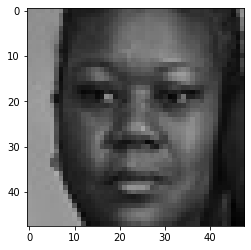

In [8]:
plt.imshow(img)

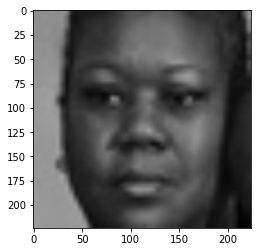

In [9]:
imgSize =224
newImg = cv2.resize(img,(imgSize,imgSize))
plt.imshow(cv2.cvtColor(newImg,cv2.COLOR_BGR2RGB))
plt.show()

In [37]:
print(img)

Training_143373.jpg


In [10]:
direc = "emotions/train/"

In [11]:
classes = ["0","1","2","3","4","5","6"] 
#name of the folders for classes

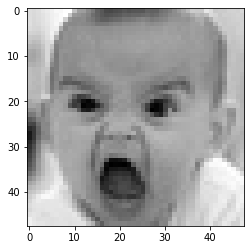

In [13]:
for category in classes:
    path = os.path.join(direc,category)
    for img in os.listdir(path):
        imgArray = cv2.imread(os.path.join(path,img))
        plt.imshow(cv2.cvtColor(imgArray,cv2.COLOR_BGR2RGB))
        plt.show()
        break
    break

In [14]:
trainingData = []

def create_trainingData():
    for category in classes:
        path = os.path.join(direc,category)
        classEmotion = classes.index(category)
        print(path)
        print(classEmotion)
        for img in os.listdir(path):
            try:
                imgArray = cv2.imread(os.path.join(path,img))
                newGroup = cv2.resize(imgArray,(imgSize,imgSize))
                trainingData.append([newGroup,classEmotion])
#                 plt.imshow(cv2.cvtColor(newGroup,cv2.COLOR_BGR2RGB))
#                 plt.show()
#                 break
            except Exception as e:
                pass

In [15]:
create_trainingData()

emotions/train/0
0
emotions/train/1
1
emotions/train/2
2
emotions/train/3
3
emotions/train/4
4
emotions/train/5
5
emotions/train/6
6


In [16]:
print(len(trainingData))

17324


In [17]:
import random

random.shuffle(trainingData) 

In [18]:
x = []
y = []

for moods,label in trainingData:
    x.append(moods)
    y.append(label)

x = np.array(x).reshape(-1,imgSize,imgSize,3)

In [19]:
x.shape

(17324, 224, 224, 3)

In [20]:
x =x/255.0;

In [21]:
y[0]

5

In [22]:
Y = np.array(y)
Y.shape

(17324,)

##### Training the model.

In [23]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [24]:
trainingModel = tf.keras.applications.MobileNetV2()

In [26]:
trainingModel.summary()

Model: "mobilenetv2_1.00_224"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
Conv1_pad (ZeroPadding2D)       (None, 225, 225, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
Conv1 (Conv2D)                  (None, 112, 112, 32) 864         Conv1_pad[0][0]                  
__________________________________________________________________________________________________
bn_Conv1 (BatchNormalization)   (None, 112, 112, 32) 128         Conv1[0][0]                      
_______________________________________________________________________________

In [26]:
##### Apply transfer Learning

Model Training

In [27]:
baseIP = trainingModel.layers[0].input

In [28]:
baseOP = trainingModel.layers[-2].output

In [29]:
baseOP

<tf.Tensor 'global_average_pooling2d/Identity:0' shape=(None, 1280) dtype=float32>

In [30]:
final_output = layers.Dense(128)(baseOP)
final_output = layers.Activation('relu')(final_output)
final_output = layers.Dense(64)(final_output)
final_output = layers.Activation('relu')(final_output)
final_output = layers.Dense(7,activation='softmax')(final_output)


In [31]:
final_output

<tf.Tensor 'dense_2/Identity:0' shape=(None, 7) dtype=float32>

In [32]:
new_model = keras.Model(inputs=baseIP,outputs=baseOP)

In [33]:
new_model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
Conv1_pad (ZeroPadding2D)       (None, 225, 225, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
Conv1 (Conv2D)                  (None, 112, 112, 32) 864         Conv1_pad[0][0]                  
__________________________________________________________________________________________________
bn_Conv1 (BatchNormalization)   (None, 112, 112, 32) 128         Conv1[0][0]                      
______________________________________________________________________________________________

In [34]:
new_model.compile(loss="sparse_categorical_crossentropy", optimizer="adam",metrics =["accuracy"])

In [35]:
new_model.fit(x,Y, epochs = 25)

Train on 17324 samples
Epoch 1/25
17324/17324 [==============================] - 2351s 136ms/sample - loss: 2.4023 - accuracy: 0.3437
Epoch 2/25
17324/17324 [==============================] - 1999s 115ms/sample - loss: 1.4906 - accuracy: 0.4617
Epoch 3/25
17324/17324 [==============================] - 2492s 144ms/sample - loss: 1.3282 - accuracy: 0.5212
Epoch 4/25
17324/17324 [==============================] - 2558s 148ms/sample - loss: 1.3848 - accuracy: 0.4915
Epoch 5/25
17324/17324 [==============================] - 2286s 132ms/sample - loss: 1.3686 - accuracy: 0.4935
Epoch 6/25
17324/17324 [==============================] - 3035s 175ms/sample - loss: 1.6947 - accuracy: 0.3443
Epoch 7/25
17324/17324 [==============================] - 2830s 163ms/sample - loss: 1.8363 - accuracy: 0.2304
Epoch 8/25
17324/17324 [==============================] - 2056s 119ms/sample - loss: 1.7809 - accuracy: 0.2787
Epoch 9/25
17324/17324 [==============================] - 2143s 124ms/sample - loss: 1.73

In [48]:
new_model.save('trained_model_no2acc50.h5')

In [49]:
#### Saved Model execution: 

In [3]:
new_model = tf.keras.models.load_model('trained_model_no2acc50.h5')

In [4]:
laughman = cv2.imread('manlaugh.jpg')

In [5]:
laughman.shape

(450, 650, 3)

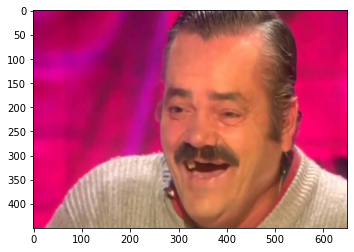

In [6]:
plt.imshow(cv2.cvtColor(laughman,cv2.COLOR_BGR2RGB))

In [7]:
faceCascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

In [8]:
gray = cv2.cvtColor(laughman,cv2.COLOR_BGR2RGB)

In [9]:
gray.shape

(450, 650, 3)

In [10]:
faces = faceCascade.detectMultiScale(gray,1.1,4)
for x,y,w,h in faces:
    roi_gray = gray[y:y+h,x:x+w]
    roi_color = laughman[y:y+h,x:x+w]
    cv2.rectangle(laughman,(x,y),(x+w,y+h),(255,0,0),2)
    faces = faceCascade.detectMultiScale(roi_gray)
    if len(faces) == 0:
        print("Face Not Detected")
    else:
        for(ex,ey,ew,eh) in faces:
            face_roi = roi_color[ey: ey+eh, ex:ex +ew]

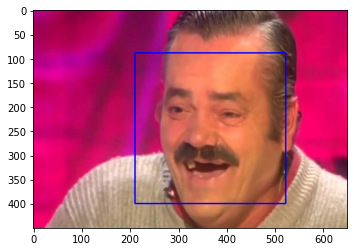

In [11]:
plt.imshow(cv2.cvtColor(laughman,cv2.COLOR_BGR2RGB))

In [12]:
final_img = cv2.resize(face_roi,(224,224))
final_img = np.expand_dims(final_img,axis=0)
final_img = final_img/255.0

In [13]:
predictions = new_model.predict(final_img)

In [14]:
predictions[0]

array([0., 0., 0., ..., 0., 0., 0.], dtype=float32)

In [15]:
np.argmax(predictions)

3

#### Video Demo

In [ ]:
import cv2
import numpy as np

path = 'haarcascade_frontalface_default.xml'
font_size = 1.3
font = cv2.FONT_HERSHEY_PLAIN

rectangle_bgr = (255,255,255)
img = np.zeros((500,500))

text = "some text in a box"

(text_width,text_height) = cv2.getTextSize(text,font,fontScale = font_size, thickness=1)[0]

text_offset_x =10
text_offset_y =img.shape[0] - 25

box_coords = ((text_offset_x,text_offset_y),(text_offset_x + text_width + 2, text_offset_y -text_height -2))
cv2.rectangle(img,box_coords[0],box_coords[1],rectangle_bgr, cv2.FILLED)
cv2.putText(img,text,(text_offset_x,text_offset_y),font,fontScale = font_size,color =(0,0,0),thickness=1)

cap = cv2.VideoCapture(1)

if not cap.isOpened():
    cap = cv2.VideoCapture(0)
if not cap.isOpened():
    raise IOError('Cannot Open Webcam')

while True:
    ret,laughman = cap.read()
    faceCascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
    gray = cv2.cvtColor(laughman, cv2.COLOR_BGR2GRAY)
    faces = faceCascade.detectMultiScale(gray,1.1,4)
    for x,y,w,h in faces:
        roi_gray = gray[y:y+h,x:x+w]
        roi_color = laughman[y:y+h,x:x+w]
        cv2.rectangle(laughman,(x,y),(x+w, y+h),(255,0,0),2)
        faces = faceCascade.detectMultiScale(roi_gray)
        if len(faces) == 0:
            print("FACE NOT DETECTED!!")
        else:
            for (ex,ey,ew,eh) in faces:
                face_roi = roi_color[ey: ey+eh, ex: ex+ew]
                
    final_img = cv2.resize(face_roi,(224,224))
    final_img = np.expand_dims(final_img,axis=0)
    final_img = final_img/255.0
        
    font = cv2.FONT_HERSHEY_PLAIN
        
    predictions = new_model.predict(final_img)
        
    font_size = 1.5
    font = cv2.FONT_HERSHEY_PLAIN
        
    if(np.argmax(predictions) == 0):
        status = 'Angry'
        x1,y1,w1,h1 = 0,0,175,75
            
        cv2.rectangle(laughman,(x1,x1),(x1+w1,y1+h1),(0,0,0),-1)
            
        cv2.putText(laughman,status,(x1 + int(w1/10),y1 +int(h1/2)),cv2.FONT_HERSHEY_SIMPLEX,0.7,(0,0,255,2))
            
        cv2.putText(laughman,status,(100,150),font,3,(0,0,255),2,cv2.LINE_4)
            
        cv2.rectangle(laughman,(x,y),(x+w,y+h),(0,0,255))
    
    elif(np.argmax(predictions)==1):
        status = 'Disgust'
        x1,y1,w1,h1 = 0,0,175,75

        cv2.rectangle(laughman,(x1,x1),(x1+w1,y1+h1),(0,0,0),-1)

        cv2.putText(laughman,status,(x1 + int(w1/10),y1 +int(h1/2)),cv2.FONT_HERSHEY_SIMPLEX,0.7,(0,0,255,2))

        cv2.putText(laughman,status,(100,150),font,3,(0,0,255),2,cv2.LINE_4)

        cv2.rectangle(laughman,(x,y),(x+w,y+h),(0,0,255))
    
    elif(np.argmax(predictions)==2):
        status = 'Fear'
        x1,y1,w1,h1 = 0,0,175,75

        cv2.rectangle(laughman,(x1,x1),(x1+w1,y1+h1),(0,0,0),-1)

        cv2.putText(laughman,status,(x1 + int(w1/10),y1 +int(h1/2)),cv2.FONT_HERSHEY_SIMPLEX,0.7,(0,0,255,2))

        cv2.putText(laughman,status,(100,150),font,3,(0,0,255),2,cv2.LINE_4)

        cv2.rectangle(laughman,(x,y),(x+w,y+h),(0,0,255))
    
    elif(np.argmax(predictions)==3):
        status = 'Happy'
        x1,y1,w1,h1 = 0,0,175,75
        
        cv2.rectangle(laughman,(x1,x1),(x1+w1,y1+h1),(0,0,0),-1)
        
        cv2.putText(laughman,status,(x1 + int(w1/10),y1 +int(h1/2)),cv2.FONT_HERSHEY_SIMPLEX,0.7,(0,0,255,2))
        
        cv2.putText(laughman,status,(100,150),font,3,(0,0,255),2,cv2.LINE_4)
        
        cv2.rectangle(laughman,(x,y),(x+w,y+h),(0,0,255))
    
    elif(np.argmax(predictions)==5):
        status = 'Sad'
        x1,y1,w1,h1 = 0,0,175,75
        
        cv2.rectangle(laughman,(x1,x1),(x1+w1,y1+h1),(0,0,0),-1)
        
        cv2.putText(laughman,status,(x1 + int(w1/10),y1 +int(h1/2)),cv2.FONT_HERSHEY_SIMPLEX,0.7,(0,0,255,2))
        
        cv2.putText(laughman,status,(100,150),font,3,(0,0,255),2,cv2.LINE_4)
        
        cv2.rectangle(laughman,(x,y),(x+w,y+h),(0,0,255))
    
    elif(np.argmax(predictions)==6):
        status = 'Surprise'
        x1,y1,w1,h1 = 0,0,175,75
        
        cv2.rectangle(laughman,(x1,x1),(x1+w1,y1+h1),(0,0,0),-1)
        
        cv2.putText(laughman,status,(x1 + int(w1/10),y1 +int(h1/2)),cv2.FONT_HERSHEY_SIMPLEX,0.7,(0,0,255,2))
        
        cv2.putText(laughman,status,(100,150),font,3,(0,0,255),2,cv2.LINE_4)
        
        cv2.rectangle(laughman,(x,y),(x+w,y+h),(0,0,255))
            
        
    cv2.imshow('Emotion Recognizer ',laughman)
        
    if cv2.waitKey(2) & 0xFF == ord('q'):
        break

cap.release
cv2.destroyAllWindows

            

     